# **Enhancing Naive Bayes Classifier with Discretization Techniques**

## **Introduction**
Naive Bayes is a probabilistic machine learning algorithm grounded in Bayes' Theorem. It is primarily used for classification tasks due to its simplicity and efficiency. The algorithm calculates the probability of a data point belonging to a particular class based on the prior probabilities of the classes and the likelihood of the data point's features.

### **How Naive Bayes Works**

Bayes' Theorem provides the mathematical foundation for Naive Bayes and is expressed as:

\[
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
\]

Where:
- \( P(C|X) \): Posterior probability, the probability of class \( C \) given the features \( X \).
- \( P(X|C) \): Likelihood, the probability of the features \( X \) given the class \( C \).
- \( P(C) \): Prior probability, the initial probability of the class \( C \) based on the training data.
- \( P(X) \): Evidence, the overall probability of the features \( X \) across all classes (used for normalization).

The Naive Bayes classifier uses these probabilities to predict the most likely class for a given instance of data.

#### **Prediction Process**
1. **Prior Probability Calculation**:
   - Compute \( P(C) \) for each class \( C \), which is the proportion of instances belonging to \( C \) in the training dataset.

2. **Likelihood Estimation**:
   - For each feature \( X_i \), calculate \( P(X_i|C) \), the likelihood of \( X_i \) given \( C \). The approach to estimate \( P(X_i|C) \) depends on the type of Naive Bayes used:


3. **Posterior Probability Calculation**:
   - Using Bayes' Theorem, calculate \( P(C|X) \) for each class \( C \), combining the prior probability \( P(C) \) and likelihoods \( P(X_i|C) \) across all features.

4. **Class Prediction**:
   - Assign the instance to the class \( C \) with the highest posterior probability:
     \[
     \hat{C} = \underset{C}{\mathrm{argmax}} \, P(C|X)
     \]

The classifier assumes that each feature contributes independently to the probability of the class, which simplifies the computation of \( P(X|C) \) as:

\[
P(X|C) = P(X_1|C) \cdot P(X_2|C) \cdot \ldots \cdot P(X_n|C)
\]

![1](Images/1.png)

---

## **Objectives**
The goal of this document is to enhance the performance of Naive Bayes classifiers through the following approaches:
1. **Handling Continuous Variables:**
   - Using discretization techniques to transform continuous variables into categorical ones.
   - Applying Kernel Density Estimation (KDE) to model continuous feature distributions without assuming normality.
   
These techniques are benchmarked against traditional Naive Bayes implementations to assess their effectiveness.



### **Discretization Techniques**
Discretization involves converting continuous variables into discrete intervals. Common methods include:
- **Equal-width binning:** Divides the range of a variable into bins of equal size.
- **Equal-frequency binning (quantile):** Divides data so that each bin contains approximately the same number of samples.



## **Advantages of Naive Bayes**
- **Efficient:** Can handle large datasets with low computational cost.
- **Interpretable:** Provides probabilistic insights into predictions.
- **Resilient to Small Data:** Performs well even with limited training data.
- **Works Well for Categorical Data:** Particularly effective for text classification and other categorical datasets.

---

## **Limitations of Naive Bayes**
- **Strong Independence Assumption:** Real-world features are rarely independent, which can lead to suboptimal performance.
- **Poor Handling of Continuous Variables:** The assumption of a specific distribution (e.g., Gaussian) often does not hold, leading to inaccuracies.
- **Sensitivity to Imbalanced Data:** May perform poorly when class distributions are skewed.

By addressing these limitations through techniques such as discretization and Kernel Density Estimation (KDE), Naive Bayes can be made more robust and applicable to a wider range of datasets.

---

## **Applications of Naive Bayes**
1. **Text Classification:** Spam detection, sentiment analysis, and topic classification.
2. **Medical Diagnosis:** Classifying diseases based on symptoms or test results.
3. **Customer Segmentation:** Grouping customers based on purchase behavior.
4. **Fraud Detection:** Identifying fraudulent transactions or activities.
5. **Recommendation Systems:** Personalizing content or product recommendations based on user preferences.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openml
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import gaussian_kde
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score


#retirar o cometario no final
import warnings
warnings.filterwarnings('ignore')


## **1. Data**

For this analysis, we use a diverse selection of datasets to evaluate the performance of Naive Bayes models when applying discretization techniques. These datasets vary significantly in size, the number of features, the ratio of continuous to categorical features, and the number of target classes. This diversity provides a comprehensive basis for comparing the behavior of Naive Bayes under different conditions.

### Overview of Datasets

| **Dataset**   | **Instances** | **Features** | **Continuous Features** | **Classes** |
|---------------|---------------|--------------|--------------------------|-------------|
| **Diabetes(0)**  | 789           | 9            | 9                        | 2           |
| **Credit-g(1)**  | 1000          | 20           | 7                        | 2           |
| **Blood(2)**     | 748           | 4            | 4                        | 2           |
| **Glass(3)**     | 214           | 9            | 9                        | 6           |
| **ILPD(4)**      | 583           | 10           | 9                        | 2           |
| **Spambase(5)**  | 4601          | 57           | 57                       | 2           |

---

### Diversity and Challenges

The datasets were chosen to reflect a variety of real-world conditions:
1. **Number of Instances**: 
   - Ranging from the relatively small `Glass` dataset (214 instances) to the large-scale `Spambase` dataset (4601 instances), the datasets allow us to test the scalability of the models.
2. **Feature Types**:
   - Some datasets, like `Blood` and `Glass`, are entirely continuous, while others, like `Credit-g`, have a mix of continuous and categorical features. This variety highlights the impact of discretization on different data types.
3. **Class Distribution**:
   - The target classes vary from simple binary problems (`Diabetes`, `ILPD`, `Spambase`) to multi-class problems (`Glass`), ensuring the models are evaluated in diverse classification scenarios.
4. **Dimensionality**:
   - The number of features ranges from as few as 4 (`Blood`) to as many as 57 (`Spambase`), testing how discretization techniques handle datasets with varying levels of complexity.

These differences make the datasets complementary, providing valuable insights into how Naive Bayes models adapt to discretized data in varying contexts.


### **1.1 Load Dataset**
The following datasets were retrieved from OpenML by name: diabetes, credit-g, blood-transfusion-service-center, glass, wine, ilpd, and spambase.

In [11]:
# List all datasets and their properties
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
#data = openml.datasets.get_dataset(61)

# Get dataset by name
data_1 = openml.datasets.get_dataset('diabetes')
data_2 = openml.datasets.get_dataset('credit-g')
data_3 = openml.datasets.get_dataset('blood-transfusion-service-center')
data_4 = openml.datasets.get_dataset('glass')
data_6 = openml.datasets.get_dataset('ilpd')
data_7 = openml.datasets.get_dataset('spambase')
#diabetes (37), credit-g (31, class),blood-transfusion-service-center (perdeu accuracy), glass(41, Type), wine(187, class), ilpd(1480, Class), spambase(44, class)


# Get the data itself as a dataframe (or otherwise)
df_diabetes, *_ = data_1.get_data(dataset_format="pandas")
df_credit, *_   = data_2.get_data(dataset_format="pandas")
df_blood, *_    = data_3.get_data(dataset_format="pandas")
df_glass, *_    = data_4.get_data(dataset_format="pandas")
df_ilpd, *_     = data_6.get_data(dataset_format="pandas")
df_spambase, *_ = data_7.get_data(dataset_format="pandas")

data = [df_diabetes,df_credit, df_blood, df_glass, df_ilpd, df_spambase]


### **1.2 Data Preparation**

To ensure the datasets were in a format suitable for training machine learning models, we performed the following preprocessing steps:

#### **1.2.1 Handling Missing Values**
- Rows or features with missing values were removed from the datasets.
- This ensures data consistency and avoids errors during model training. While this approach might lead to some data loss, it simplifies the preprocessing pipeline.


In [12]:
for i in data :
    i = i.dropna()

#### **1.2.2 Categorical Data Transformation**
- For datasets with categorical features (e.g., `Credit-g`), we applied **one-hot encoding** to transform these into numerical features.
- **One-Hot Encoding Explained**:  
   One-hot encoding is a technique that converts categorical variables with \(k\) unique categories into \(k\) binary features. Each binary feature represents whether a specific category is present.  
   For instance:
   - A categorical variable "Day" with values: `Monday`, `Tuesday`, `Wednesday`.
   - After one-hot encoding, it is transformed into three binary features: `Day_Monday`, `Day_Tuesday`, and `Day_Wednesday`.
   - If the original value is `Tuesday`, the transformed representation would be `(0, 1, 0)`.

   This transformation ensures categorical data is compatible with machine learning models, which often require numerical inputs.


In [13]:
# Target column names for each dataset
target_columns = [
    'class',  # diabetes
    'class',  # credit
    'Class',  # blood
    'Type',   # glass
    'Class', # ilpd
    'class'   # spambase
]

# Process each dataset
processed_data = []

for idx, dataset in enumerate(data):
    print(f"Processing dataset at index {idx}...")

    # Extract features and target
    target_col = target_columns[idx]
    X = dataset.drop(columns=[target_col])  # Features
    y = dataset[target_col]  # Target

    # Apply one-hot encoding to categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Encode the target if it's categorical
    if y.dtype == 'object' or y.dtype.name == 'category':
        encoder = LabelEncoder()
        y = encoder.fit_transform(y)

    # Store processed X and y in a list
    processed_data.append((X, y))

    # Print summary for the dataset
    print(f"Dataset {idx} shape after encoding: {X.shape}")
    print(f"Number of classes in target: {len(np.unique(y))}")
    print()



Processing dataset at index 0...
Dataset 0 shape after encoding: (768, 8)
Number of classes in target: 2

Processing dataset at index 1...
Dataset 1 shape after encoding: (1000, 50)
Number of classes in target: 2

Processing dataset at index 2...
Dataset 2 shape after encoding: (748, 4)
Number of classes in target: 2

Processing dataset at index 3...
Dataset 3 shape after encoding: (214, 9)
Number of classes in target: 6

Processing dataset at index 4...
Dataset 4 shape after encoding: (583, 10)
Number of classes in target: 2

Processing dataset at index 5...
Dataset 5 shape after encoding: (4601, 57)
Number of classes in target: 2



# **2. Testing performance improve with discretization**
In this section, we investigate whether discretization of continuous variables can improve the accuracy of Naive Bayes models. Discretization transforms continuous features into categorical bins, simplifying the model and potentially making it more suitable for certain datasets. 

By evaluating the accuracy of the discretized Naive Bayes model, we aim to determine if this preprocessing step enhances the model's predictive performance.

## **Multinomial Naive Bayes**
Multinomial Naive Bayes is a probabilistic machine learning algorithm primarily used for classification tasks involving discrete data. It is based on Bayes' Theorem, which calculates the posterior probability of a class given the input features by combining prior probabilities with likelihoods. The "multinomial" aspect of the algorithm refers to its ability to handle data represented as frequency counts or categorical variables.

#### **How It Works**:
1. **Assumption of Conditional Independence**:
   - Like all Naive Bayes variants, the model assumes that features are conditionally independent given the class label. This simplifies the calculation of probabilities.

2. **Feature Representation**:
   - Multinomial Naive Bayes is designed to work with data where features represent frequencies or occurrences (e.g., word counts in text classification). It treats the input data as vectors of counts for each feature.

3. **Calculation of Probabilities**:
   - For a given feature vector \( x = (x_1, x_2, ..., x_n) \), the model calculates the probability of each class \( c \) as:
     \[
     P(c|x) \propto P(c) \prod_{i=1}^n P(x_i|c)
     \]
     - \( P(c) \): The prior probability of class \( c \), often calculated as the proportion of training samples in that class.
     - \( P(x_i|c) \): The likelihood, calculated as the relative frequency of feature \( x_i \) in class \( c \) smoothed with techniques like Laplace smoothing to handle zero probabilities.

4. **Prediction**:
   - The model assigns the class with the highest posterior probability \( P(c|x) \) to the input instance.


![1](Images/2.png)

*Source: https://towardsdatascience.com/multinomial-naive-bayes-classifier-c861311caff9*


---

#### **Key Characteristics**:
- **Strengths**:
   - Highly effective for discrete feature datasets, such as word counts in text classification tasks.
   - Simple and computationally efficient, making it well-suited for high-dimensional and sparse data.
   - Robust to irrelevant features due to its probabilistic nature, which focuses on feature likelihoods per class.

- **Weaknesses**:
  - Requires discrete or non-negative data, which may necessitate preprocessing like discretization for continuous features.
  - Assumes feature independence and class-conditional probabilities derived from a multinomial distribution, which may not hold in all datasets, impacting performance.

---


#### **Applications**:
Multinomial Naive Bayes is widely used in:
- **Text Classification**: Spam detection, sentiment analysis, and topic categorization, where features are word frequencies.
- **Document Categorization**: Assigning documents to predefined categories based on term counts.


### **2.1 Multinomial Naive Bayes**

In this subsection, we focus on the implementation and evaluation of the Multinomial Naive Bayes model, with an emphasis on testing the impact of discretization. Discretization involves transforming continuous features into categorical bins, which aligns well with the assumptions of the Multinomial Naive Bayes algorithm. The model is designed to work with discrete features, so preprocessing continuous features through discretization allows for a more appropriate application of the algorithm.

We evaluate how this transformation affects the model's accuracy, analyzing whether discretization enhances its ability to handle the data effectively. By comparing the results, we aim to gain insights into the effectiveness of the Multinomial Naive Bayes model when applied to discretized datasets, providing a clearer understanding of its performance in this context.

---

#### **2.1.1 No Discretization**

In this step, we evaluate the performance of the Multinomial Naive Bayes model on datasets without applying discretization. The goal is to establish a baseline accuracy for comparison with results obtained after discretization.

To achieve this, we use **10-Fold Cross-Validation**, a method that splits the dataset into 10 subsets (folds) and trains the model on 9 folds while testing it on the remaining fold. This process is repeated 10 times, with each fold serving as the test set once. The average accuracy across all folds provides a reliable measure of the model's performance.




In [14]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):
    print(f"Testing dataset {idx} with 10-Fold Cross-Validation...")

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train Multinomial Naive Bayes model
        mnb = MultinomialNB()
        mnb.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred_mnb = mnb.predict(X_test)
        accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
        fold_accuracies.append(accuracy_mnb)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with Gaussian Naive Bayes: {average_accuracy:.4f}\n")

Testing dataset 0 with 10-Fold Cross-Validation...
Average Accuracy for dataset 0 with Gaussian Naive Bayes: 0.6003

Testing dataset 1 with 10-Fold Cross-Validation...
Average Accuracy for dataset 1 with Gaussian Naive Bayes: 0.6300

Testing dataset 2 with 10-Fold Cross-Validation...
Average Accuracy for dataset 2 with Gaussian Naive Bayes: 0.7097

Testing dataset 3 with 10-Fold Cross-Validation...
Average Accuracy for dataset 3 with Gaussian Naive Bayes: 0.5199

Testing dataset 4 with 10-Fold Cross-Validation...
Average Accuracy for dataset 4 with Gaussian Naive Bayes: 0.4804

Testing dataset 5 with 10-Fold Cross-Validation...
Average Accuracy for dataset 5 with Gaussian Naive Bayes: 0.7903




### **2.1.2 Equal Width Discretization**


Equal width discretization, also known as **uniform binning**, divides the range of a continuous feature into \(k\) intervals (bins) of equal size. The bin boundaries are determined by calculating the range of the feature (i.e., the difference between the maximum and minimum values) and dividing it into \(k\) equal parts.

For example:
- If a feature has values ranging from 0 to 100 and we choose \(k = 5\), the bins will be: [0, 20), [20, 40), [40, 60), [60, 80), [80, 100].
- Each bin represents a fixed width, regardless of how many data points fall into it.

**Advantages**:
- Simple to implement.
- Ensures that bins cover the entire range of the data, even if some bins have few or no data points.

**Disadvantages**:
- Can result in imbalanced bins, where some bins are densely populated while others are sparsely populated or empty, especially if the data distribution is skewed.


In [15]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Train and Test Split
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Discretize the train and test datasets
        kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
        X_train_binned = kbins.fit_transform(np.nan_to_num(X_train))
        X_test_binned = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = MultinomialNB()
        mnb.fit(X_train_binned, y_train)

        # Predict and calculate accuracy
        y_pred_bin = mnb.predict(X_test_binned)
        accuracy_bin = accuracy_score(y_test, y_pred_bin)
        fold_accuracies.append(accuracy_bin)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with equal-width discretization: {average_accuracy:.4f}\n")

Average Accuracy for dataset 0 with equal-width discretization: 0.6498

Average Accuracy for dataset 1 with equal-width discretization: 0.6870

Average Accuracy for dataset 2 with equal-width discretization: 0.7620

Average Accuracy for dataset 3 with equal-width discretization: 0.5762

Average Accuracy for dataset 4 with equal-width discretization: 0.6052

Average Accuracy for dataset 5 with equal-width discretization: 0.8068



### **2.1.3 Equal Depth Discretization**

Equal depth discretization, also known as **frequency binning**, divides the continuous feature into \(k\) bins such that each bin contains approximately the same number of data points. The bin boundaries are chosen so that the data is evenly distributed across the bins.

For example:
- If a feature has 100 data points and \(k = 5\), each bin will contain approximately 20 data points. The bin ranges are determined based on the sorted values of the feature.

**Advantages**:
- Ensures balanced bins, which can be particularly useful for skewed or unevenly distributed data.
- Helps to prevent over-representation of dense regions of the feature space.

**Disadvantages**:
- Bin widths are not uniform, which can make interpretation of the bins less intuitive.
- Sensitive to outliers, as extreme values can cause uneven spacing between bin boundaries.

---

In [16]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Train and Test Split
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Discretize the train and test datasets
        kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
        X_train_binned = kbins.fit_transform(np.nan_to_num(X_train))
        X_test_binned = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = MultinomialNB()
        mnb.fit(X_train_binned, y_train)

        # Predict and calculate accuracy
        y_pred_bin = mnb.predict(X_test_binned)
        accuracy_bin = accuracy_score(y_test, y_pred_bin)
        fold_accuracies.append(accuracy_bin)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with equal-depth discretization: {average_accuracy:.4f}\n")

Average Accuracy for dataset 0 with equal-depth discretization: 0.6835

Average Accuracy for dataset 1 with equal-depth discretization: 0.7040

Average Accuracy for dataset 2 with equal-depth discretization: 0.7379

Average Accuracy for dataset 3 with equal-depth discretization: 0.5251

Average Accuracy for dataset 4 with equal-depth discretization: 0.6603

Average Accuracy for dataset 5 with equal-depth discretization: 0.8724



### **2.1.4 ROC Analysis**

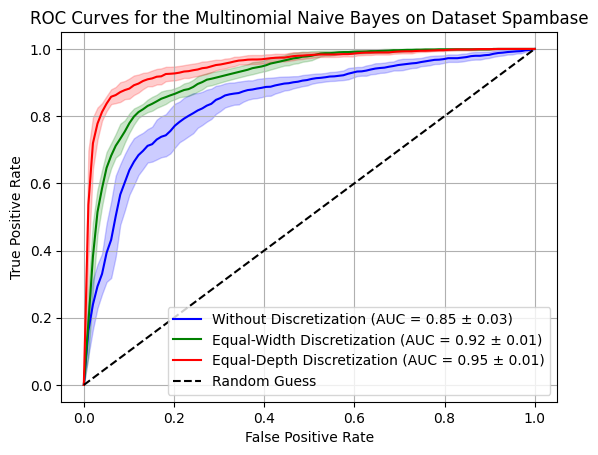

In [17]:
# Dataset index to process
target_idx = 5

# Colors for each model
colors = ['b', 'g', 'r']
model_labels = [
    "Without Discretization",
    "Equal-Width Discretization",
    "Equal-Depth Discretization"
]

# Fetch Dataset 5
X, y = processed_data[target_idx]

# Ensure X and y are NumPy arrays
X = np.array(X)
y = np.array(y)

# Initialize 10-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize placeholders for ROC curves and AUCs
mean_fpr = np.linspace(0, 1, 100)
all_tprs = []
all_aucs = []

# Define the models to evaluate
discretizers = [
    None,  # Without Discretization
    KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None),
    KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
]

# Loop through each model
for model_idx, discretizer in enumerate(discretizers):
    tprs = []
    aucs = []

    for train_idx, test_idx in skf.split(X, y):
        # Split into train/test sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Apply discretization if required
        if discretizer:
            kbins = discretizer
            X_train = kbins.fit_transform(np.nan_to_num(X_train))
            X_test = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = MultinomialNB()
        mnb.fit(X_train, y_train)

        # Get predicted probabilities for ROC curve
        y_prob = mnb.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        auc = roc_auc_score(y_test, y_prob)
        aucs.append(auc)

        # Interpolate TPR for consistent ROC curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Calculate mean and std TPR for this model
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    # Store results
    all_tprs.append(mean_tpr)
    all_aucs.append((mean_auc, std_auc))

    # Plot ROC curve
    plt.plot(
        mean_fpr, mean_tpr, 
        label=f"{model_labels[model_idx]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})", 
        color=colors[model_idx]
    )

    # Fill confidence interval
    tpr_upper = np.minimum(mean_tpr + np.std(tprs, axis=0), 1)
    tpr_lower = np.maximum(mean_tpr - np.std(tprs, axis=0), 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color=colors[model_idx], alpha=0.2)

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves for the Multinomial Naive Bayes on Dataset Spambase")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **2.1.5 Multinomial Naive Bayes Results and Conclusion**

After applying discretization techniques and evaluating the performance of the Multinomial Naive Bayes model, we obtained the following results:

| **Dataset**  | **No Discretization** | **Equal Width** | **Equal Depth** | **Equal Width - No Discretization** | **Equal Depth - No Discretization** |
|---------------|-----------------------|-----------------|-----------------|-------------------------------------|-------------------------------------|
| **Diabetes**  | 0.6003               | 0.6498         | 0.6835         |+ 0.0495                              |+ 0.0832                              |
| **Credit**    | 0.6300               | 0.6870         | 0.7040         |+ 0.0570                              |+ 0.0740                              |
| **Blood**     | 0.7097               | 0.7620         | 0.7379         |+ 0.0523                              |+ 0.0282                              |
| **Glass**     | 0.5199               | 0.5762         | 0.5251         |+ 0.0563                              |+ 0.0052                              |
| **Ilpd**      | 0.4804               | 0.6052         | 0.6603         |+ 0.1248                              |+ 0.1799                              |
| **Spambase**  | 0.7903               | 0.8068         | 0.8724         |+ 0.0165                              |+ 0.0821                              |

For **Dataset 5 (Spambase)** specifically, the ROC analysis for the three models yielded the following results:
- **No Discretization**: AUC = 0.85 ± 0.03  
- **Equal Width Discretization**: AUC = 0.92 ± 0.01  
- **Equal Depth Discretization**: AUC = 0.95 ± 0.01  

---

#### **Key Observations**

1. **Overall Improvement with Discretization**  
   Discretization consistently improved the model's performance across most datasets, including Dataset 5. This improvement is due to the alignment of discretized data with the Multinomial Naive Bayes model's assumptions. By converting continuous features into categorical bins, the model can better capture data patterns, resulting in enhanced predictive accuracy.

2. **Superiority of Equal Depth Discretization**  
   Equal depth discretization outperformed equal width discretization in most datasets, including Dataset 5, where it achieved the highest AUC of 0.95 ± 0.01. Equal depth ensures that each bin contains an approximately equal number of data points, which is especially beneficial for datasets with imbalanced distributions.

3. **Dataset-Specific Behavior**  
   - For **Dataset 4 (Ilpd)**, equal depth discretization resulted in the most significant improvement, reflecting its ability to handle highly imbalanced or complex distributions effectively.
   - Smaller improvements observed with equal width suggest it may be less effective for datasets with non-uniform distributions.

4. **Challenges Without Discretization**  
   Without discretization, the Multinomial Naive Bayes model performs less effectively (AUC = 0.85 ± 0.03 for Dataset Spambase) due to its reliance on discrete features. Continuous data violates this assumption, leading to suboptimal results.

---

#### **Conclusion**

The results confirm that discretization, particularly equal depth discretization, substantially enhances the performance of the Multinomial Naive Bayes model by transforming continuous features into a more suitable format. The superiority of equal depth discretization, evidenced by its highest AUC for Dataset Spambase (0.95 ± 0.01), highlights its effectiveness in addressing imbalanced distributions. These findings emphasize the critical role of appropriate preprocessing techniques in optimizing machine learning model performance.



## **Gaussian Naive Bayes**
Gaussian Naive Bayes is a probabilistic machine learning algorithm designed for classification tasks involving continuous numerical features. Unlike Multinomial Naive Bayes, which works best with discrete data, Gaussian Naive Bayes assumes that each continuous feature follows a Gaussian (normal) distribution. This makes it particularly effective for datasets where the normality assumption approximately holds.

#### **How It Works**:
1. **Assumption of Conditional Independence**:
   - Similar to other Naive Bayes variants, Gaussian Naive Bayes assumes that features are conditionally independent given the class label. This simplifies the computation of joint probabilities, allowing the model to scale efficiently to high-dimensional datasets.

2. **Gaussian Likelihood**:
   - The likelihood of a feature \( x_i \) given a class \( c \) is modeled using a Gaussian distribution:
     \[
     P(x_i|c) = \frac{1}{\sqrt{2\pi\sigma_c^2}} \exp\left(-\frac{(x_i - \mu_c)^2}{2\sigma_c^2}\right)
     \]
     Here:
     - \( \mu_c \): Mean of the feature values for class \( c \).
     - \( \sigma_c^2 \): Variance of the feature values for class \( c \).
   - This formulation allows the algorithm to directly handle continuous data, making it a natural choice for problems involving numerical features.

3. **Calculation of Probabilities**:
   - For a given feature vector \( x = (x_1, x_2, ..., x_n) \), Gaussian Naive Bayes calculates the posterior probability of each class \( c \) as:
     \[
     P(c|x) \propto P(c) \prod_{i=1}^n P(x_i|c)
     \]
     - \( P(c) \): Prior probability of class \( c \), determined by the class distribution in the training data.
     - \( P(x_i|c) \): Gaussian likelihood for each feature \( x_i \).

4. **Prediction**:
   - The class \( c \) with the highest posterior probability is assigned to the input instance:
     \[
     \hat{c} = \arg\max_c P(c|x)
     \]

![1](Images/3.png)

*Source: https://medium.com/@kashishdafe0410/gaussian-naive-bayes-understanding-the-basics-and-applications-52098087b963*

---

#### **Key Characteristics**:
- **Strengths**:
  - Simple and computationally efficient, even for high-dimensional data.
  - Naturally handles continuous numerical data without requiring transformation or discretization.
  - Performs well with small datasets where features closely follow a Gaussian distribution.

- **Weaknesses**:
  - Assumes that each feature is normally distributed, which may not hold for all datasets, leading to potential inaccuracies.

---

#### **Applications**:
Gaussian Naive Bayes is commonly used in:
- **Medical Diagnosis**: Predicting diseases based on continuous measurements like blood pressure, cholesterol levels, or test results.
- **Spam Detection**: Classifying email content based on numerical features such as word length or frequency distributions.
- **Anomaly Detection**: Identifying outliers or unusual patterns in continuous data, such as sensor readings or financial transactions.

---

#### **Why Gaussian Naive Bayes Excels with Continuous Data**:
Unlike Multinomial Naive Bayes, which requires discrete or discretized data, Gaussian Naive Bayes operates directly on continuous features. By modeling the likelihood of each feature as a Gaussian distribution, it efficiently incorporates the natural variability of numerical data, often yielding superior results when the Gaussian assumption approximately holds.

---

#### **2.2.1 Performance Without Discretization**:
In this section, we evaluate Gaussian Naive Bayes on datasets without applying discretization. This provides a baseline for understanding how well the algorithm leverages its Gaussian assumptions. Using **10-Fold Cross-Validation**, we measure its accuracy, comparing results across different datasets to assess its effectiveness and limitations in handling continuous data directly.




In [18]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):
    print(f"Testing dataset {idx} with 10-Fold Cross-Validation...")

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train Multinomial Naive Bayes model
        mnb = GaussianNB()
        mnb.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred_mnb = mnb.predict(X_test)
        accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
        fold_accuracies.append(accuracy_mnb)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with Gaussian Naive Bayes: {average_accuracy:.4f}\n")

Testing dataset 0 with 10-Fold Cross-Validation...
Average Accuracy for dataset 0 with Gaussian Naive Bayes: 0.7552

Testing dataset 1 with 10-Fold Cross-Validation...
Average Accuracy for dataset 1 with Gaussian Naive Bayes: 0.7090

Testing dataset 2 with 10-Fold Cross-Validation...
Average Accuracy for dataset 2 with Gaussian Naive Bayes: 0.7446

Testing dataset 3 with 10-Fold Cross-Validation...
Average Accuracy for dataset 3 with Gaussian Naive Bayes: 0.4532

Testing dataset 4 with 10-Fold Cross-Validation...
Average Accuracy for dataset 4 with Gaussian Naive Bayes: 0.5643

Testing dataset 5 with 10-Fold Cross-Validation...
Average Accuracy for dataset 5 with Gaussian Naive Bayes: 0.8203



### **2.2.2 Equal Width Discretization**
In this section, we evaluate Gaussian Naive Bayes on datasets applying equal-width discretization which has been explained in point **2.1.2 Equal Width Discretization**.

In [19]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Train and Test Split
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Discretize the train and test datasets
        kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
        X_train_binned = kbins.fit_transform(np.nan_to_num(X_train))
        X_test_binned = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = GaussianNB()
        mnb.fit(X_train_binned, y_train)

        # Predict and calculate accuracy
        y_pred_bin = mnb.predict(X_test_binned)
        accuracy_bin = accuracy_score(y_test, y_pred_bin)
        fold_accuracies.append(accuracy_bin)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with equal-width discretization: {average_accuracy:.4f}\n")

Average Accuracy for dataset 0 with equal-width discretization: 0.7512

Average Accuracy for dataset 1 with equal-width discretization: 0.6800

Average Accuracy for dataset 2 with equal-width discretization: 0.7406

Average Accuracy for dataset 3 with equal-width discretization: 0.3173

Average Accuracy for dataset 4 with equal-width discretization: 0.4512

Average Accuracy for dataset 5 with equal-width discretization: 0.6805



### **2.2.3 Equal Depth Discretization**
In this section, we evaluate Gaussian Naive Bayes on datasets applying equal-depth discretization which has been explained in point **2.2.3 Equal Depth Discretization**.

In [20]:
# Iterate over each processed dataset
for idx, (X, y) in enumerate(processed_data):

    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize 10-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform 10-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Train and Test Split
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Discretize the train and test datasets
        kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
        X_train_binned = kbins.fit_transform(np.nan_to_num(X_train))
        X_test_binned = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = GaussianNB()
        mnb.fit(X_train_binned, y_train)

        # Predict and calculate accuracy
        y_pred_bin = mnb.predict(X_test_binned)
        accuracy_bin = accuracy_score(y_test, y_pred_bin)
        fold_accuracies.append(accuracy_bin)

    # Calculate and display the average accuracy across folds
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy for dataset {idx} with equal-depth discretization: {average_accuracy:.4f}\n")

Average Accuracy for dataset 0 with equal-depth discretization: 0.7460

Average Accuracy for dataset 1 with equal-depth discretization: 0.6960

Average Accuracy for dataset 2 with equal-depth discretization: 0.7366

Average Accuracy for dataset 3 with equal-depth discretization: 0.3173

Average Accuracy for dataset 4 with equal-depth discretization: 0.6756

Average Accuracy for dataset 5 with equal-depth discretization: 0.9011



### **2.2.4 ROC Analysis**

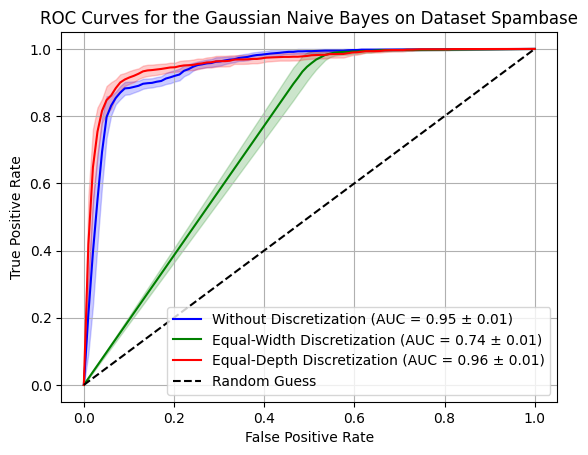

In [21]:
# Dataset index to process
target_idx = 5

# Colors for each model
colors = ['b', 'g', 'r']
model_labels = [
    "Without Discretization",
    "Equal-Width Discretization",
    "Equal-Depth Discretization"
]

# Fetch Dataset 5
X, y = processed_data[target_idx]

# Ensure X and y are NumPy arrays
X = np.array(X)
y = np.array(y)

# Initialize 10-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize placeholders for ROC curves and AUCs
mean_fpr = np.linspace(0, 1, 100)
all_tprs = []
all_aucs = []

# Define the models to evaluate
discretizers = [
    None,  # Without Discretization
    KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None),
    KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
]

# Loop through each model
for model_idx, discretizer in enumerate(discretizers):
    tprs = []
    aucs = []

    for train_idx, test_idx in skf.split(X, y):
        # Split into train/test sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Apply discretization if required
        if discretizer:
            kbins = discretizer
            X_train = kbins.fit_transform(np.nan_to_num(X_train))
            X_test = kbins.transform(np.nan_to_num(X_test))

        # Train Multinomial Naive Bayes
        mnb = GaussianNB()
        mnb.fit(X_train, y_train)

        # Get predicted probabilities for ROC curve
        y_prob = mnb.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        auc = roc_auc_score(y_test, y_prob)
        aucs.append(auc)

        # Interpolate TPR for consistent ROC curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Calculate mean and std TPR for this model
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    # Store results
    all_tprs.append(mean_tpr)
    all_aucs.append((mean_auc, std_auc))

    # Plot ROC curve
    plt.plot(
        mean_fpr, mean_tpr, 
        label=f"{model_labels[model_idx]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})", 
        color=colors[model_idx]
    )

    # Fill confidence interval
    tpr_upper = np.minimum(mean_tpr + np.std(tprs, axis=0), 1)
    tpr_lower = np.maximum(mean_tpr - np.std(tprs, axis=0), 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color=colors[model_idx], alpha=0.2)

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves for the Gaussian Naive Bayes on Dataset Spambase")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **2.2.5 Results and Conclusion**

After applying discretization techniques and evaluating the performance of the Gaussian Naive Bayes model, we obtained the following results:

| **Dataset**   | **No Discretization** | **Equal Width** | **Equal Depth** | **Equal Width - No Discretization** | **Equal Depth - No Discretization** |
|---------------|-----------------------|-----------------|-----------------|-------------------------------------|-------------------------------------|
| **Diabetes**  | 0.7552               | 0.7512         | 0.7460         | -0.0040                             | -0.0092                             |
| **Credit**    | 0.7130               | 0.6800         | 0.6960         | -0.0330                             | -0.0170                             |
| **Blood**     | 0.7446               | 0.7406         | 0.7366         | -0.0040                             | -0.0080                             |
| **Glass**     | 0.4532               | 0.3173         | 0.3173         | -0.1359                             | -0.1359                             |
| **Ilpd**      | 0.5643               | 0.4512         | 0.6756         | -0.1131                             | +0.1113                              |
| **Spambase**  | 0.8203               | 0.6805         | 0.9011         | -0.1398                             | +0.0808                              |

For **Dataset 5 (Spambase)** specifically, the ROC analysis for the three models yielded the following results:
- **No Discretization**: AUC = 0.95 ± 0.01  
- **Equal Width Discretization**: AUC = 0.74 ± 0.01  
- **Equal Depth Discretization**: AUC = 0.96 ± 0.01  

---

#### **Key Observations**

1. **Performance Without Discretization**  
   Gaussian Naive Bayes excels at handling continuous numerical data, as it assumes the features follow a Gaussian distribution. This explains the high AUC value of 0.95 ± 0.01 for Dataset 5 without discretization.

2. **Impact of Discretization**  
   Discretization generally led to a decline in performance for Gaussian Naive Bayes on most datasets, including Dataset 5 with equal width discretization (AUC = 0.74 ± 0.01). The loss of granularity introduced by binning continuous features reduces the model's ability to leverage its assumption of Gaussian distributions.

3. **Equal Depth vs. Equal Width**  
   - Equal depth discretization performed significantly better than equal width for Dataset 5, achieving an AUC of 0.96 ± 0.01 compared to 0.74 ± 0.01 for equal width. The balanced bins created by equal depth help mitigate the adverse effects of discretization.  
   - This improvement highlights equal depth's effectiveness in handling complex distributions compared to the more simplistic binning of equal width.

4. **Dataset-Specific Behavior**  
   - For **Dataset 5 (Spambase)**, the high performance with equal depth discretization demonstrates its potential to recover some of the model's original effectiveness after discretization.  
   - The notable drop with equal width emphasizes its limitations in retaining meaningful feature representations for Gaussian Naive Bayes.

---

#### **Conclusion**

The results confirm that Gaussian Naive Bayes is inherently well-suited for continuous data, with its assumption of Gaussian distributions aligning perfectly with such features. For Dataset 5, the highest AUC of 0.96 ± 0.01 was achieved with equal depth discretization, showcasing its capacity to minimize the negative impacts of discretization. However, the significant performance drop with equal width (AUC = 0.74 ± 0.01) further underscores the importance of preserving data granularity or choosing a more sophisticated discretization approach, such as equal depth, when preprocessing continuous features.



## **3. Overall Conclusion and Future Prospects**

#### **Overall Conclusion**

This analysis highlighted the distinct performance characteristics of Multinomial Naive Bayes and Gaussian Naive Bayes under various preprocessing conditions:  

1. **Model Strengths**  
   - **Multinomial Naive Bayes** showed clear benefits from discretization, particularly with equal depth binning, as it relies on categorical features and struggles with continuous data. Transforming continuous features into discrete bins aligned the data with the model's assumptions, resulting in performance gains across most datasets.  
   - **Gaussian Naive Bayes**, on the other hand, excelled in handling continuous data directly, as it assumes features follow a Gaussian distribution. Discretization often reduced its performance, indicating that it thrives on unaltered numerical data.

2. **Discretization Observations**  
   - Equal depth generally outperformed equal width in both models when discretization was applied. This can be attributed to the balanced representation of data across bins, which is particularly valuable for datasets with skewed or imbalanced distributions.  
   - The impact of discretization varied across datasets. While some datasets benefited from discretization, others—like **Glass** in Gaussian Naive Bayes—suffered significant performance losses due to the loss of granularity or the inherently challenging nature of the dataset.

3. **Dataset Dependency**  
   The effectiveness of each model and preprocessing technique was highly dataset-dependent. Multinomial Naive Bayes showed better compatibility with datasets transformed into categorical formats, while Gaussian Naive Bayes performed better on datasets with naturally continuous features.

---

#### **Future Prospects**

To further explore and enhance the performance of Naive Bayes models, several avenues for future work are proposed:  

1. **Testing with Different Bin Sizes**  
   Experimenting with varied bin sizes for discretization could provide insights into how granularity impacts model performance. Smaller bins might capture finer details, while larger bins could generalize better.  

2. **Exploring Additional Discretization Methods**  
   Beyond equal width and equal depth, advanced methods like k-means binning, entropy-based binning, or supervised discretization could be tested to determine their suitability for specific datasets and models.  

3. **Evaluating on Diverse Datasets**  
   Expanding the analysis to include datasets with different distributions, feature complexities, and domains can help generalize the findings and understand how preprocessing impacts performance across a broader spectrum of problems.  

4. **Incorporating Hybrid Models**  
   Combining the strengths of both Multinomial and Gaussian Naive Bayes could be explored. For example, hybrid models might process continuous and categorical features simultaneously, leveraging the strengths of each approach.

By pursuing these directions, we can deepen our understanding of Naive Bayes models, optimize their performance, and refine preprocessing strategies to suit diverse data-driven applications.


# 4. KDE Naive Bayes: A Flexible Approach to Continuous Data

This section introduces a **custom variant of Naive Bayes** that utilizes **Kernel Density Estimation (KDE)** to model continuous features. Unlike classical variants that assume specific distributions or require discretization, KDE Naive Bayes flexibly adapts to the underlying data distribution, making it a robust choice for real-world scenarios.

---

### **How Does KDE Naive Bayes Compare to Classic Variants?**

1. **Gaussian Naive Bayes**:
   - Assumes continuous features follow a normal (Gaussian) distribution.
   - Performs well if this assumption is valid, but struggles with skewed, multimodal, or irregular distributions.

2. **Multinomial Naive Bayes**:
   - Designed for discrete data, such as word counts in natural language processing.
   - Requires continuous variables to be discretized first, which can lead to loss of information.

3. **Bernoulli Naive Bayes**:
   - Suitable for binary features (0 or 1), often used in text classification (e.g., word presence/absence).
   - Not applicable to datasets with continuous features.

4. **KDE Naive Bayes (This Algorithm)**:
   - **No Distribution Assumptions:** Models the probability density of continuous features using KDE.
   - **Handles Arbitrary Distributions:** Works effectively with skewed, multimodal, or non-Gaussian data.
   - **Retains Feature Information:** Avoids the information loss caused by discretization.
---

## Why Use KDE Naive Bayes?

### Key Advantages

- **No Distributional Assumptions:** KDE Naive Bayes relies on empirical density estimation rather than assuming normality or another fixed form.
- **Handles Arbitrary Distributions:** Effective for skewed, multimodal, or otherwise complex distributions.
- **No Discretization Needed:** Preserves the richness of continuous features by avoiding arbitrary binning.

### When to Consider KDE Naive Bayes

- When you have continuous data that doesn't conform to common assumptions (e.g., non-normality).
- If discretization would lead to a loss of feature information.
- For datasets where traditional Naive Bayes approaches struggle due to distributional complexity.

---

## What is Kernel Density Estimation (KDE)?

**Kernel Density Estimation (KDE)** is a non-parametric technique for estimating a probability density function (PDF) directly from data. Instead of assuming a specific distribution (like Gaussian), KDE constructs the PDF by placing a smooth, localized function (kernel) around each observed data point.

### How KDE Works

1. **Place a Kernel at Each Data Point:** A kernel (often Gaussian) is centered at each data sample.
2. **Sum and Smooth:** These individual kernel contributions are summed to form a continuous density curve.
3. **Bandwidth Selection:** The bandwidth (smoothing parameter) determines how "wide" each kernel is. A larger bandwidth produces a smoother estimate, while a smaller bandwidth captures more fine-grained details.

### Why Use KDE?

- **Arbitrary Distributions:** KDE can model complex shapes, including skewed and multimodal data.
- **No Fixed Parametric Form:** It adapts to the actual distribution rather than enforcing a particular shape.
- **Enhanced Flexibility:** Useful when you have limited prior knowledge of the underlying data distribution.

---

By integrating KDE into Naive Bayes, we gain a more flexible and powerful method for handling continuous features.

In [22]:
target_columns = [
    'class',  # diabetes
    'class',  # credit
    'Class',  # blood
    'Type',   # glass
    'Class', # ilpd
    'class'   # spambase
]

# Process each dataset
processed_data_kde = []

for idx, dataset in enumerate(data):
    print(f"Processing dataset at index {idx}...")
    
    # Extract features and target
    target_col = target_columns[idx]
    X_kde = dataset.drop(columns=[target_col])  # Features  
    y_kde = dataset[target_col]  # Target
    
    # Encode categorical columns in features
    for col in X_kde.columns:
        if X_kde[col].dtype == 'object' or X_kde[col].dtype.name == 'category':
            encoder = LabelEncoder()
            X_kde[col] = encoder.fit_transform(X_kde[col])
    
    # Encode the target if it's categorical
    if y_kde.dtype == 'object' or y_kde.dtype.name == 'category':
        encoder = LabelEncoder()
        y_kde = encoder.fit_transform(y_kde)
    
    # Store processed X and y in a list
    processed_data_kde.append((X_kde, y_kde))

Processing dataset at index 0...
Processing dataset at index 1...
Processing dataset at index 2...
Processing dataset at index 3...
Processing dataset at index 4...
Processing dataset at index 5...


### **4.1 Code KDE Naive Bayes Overview**

This custom Naive Bayes classifier uses **Kernel Density Estimation (KDE)** to model the probability distributions of continuous features. Unlike standard Naive Bayes variants, which assume a specific distribution (e.g., Gaussian), this approach directly estimates how data is distributed based on the observed samples. By doing so, it becomes more flexible and better suited to datasets that don’t fit traditional assumptions.

**Kernel Selection:** For this KDE-based Naive Bayes method, a Gaussian kernel will be used to achieve smoother and more accurate density estimation.

**How It Works:**

- **Training:** For each class, the algorithm uses KDE to estimate how likely each continuous feature value is. This provides a non-parametric way of understanding the distribution of features within each class, without making strong assumptions about their shape.

- **Prediction:** When classifying a new sample, the model looks up the likelihood of its features under each class’s KDE-based estimates and then combines these with the class’s prior probability. The class with the highest resulting probability is chosen as the prediction.

In essence, this KDE-based approach extends Naive Bayes to handle complex, real-world continuous data distributions, making it more robust and adaptable than its traditional counterparts.

**Data Requirements and Constraints**

To ensure that the KDE Naive Bayes algorithm functions correctly, it is important to respect certain data constraints:

1. **Sufficient Data for KDE**:  
   KDE estimation relies on having enough data points to estimate the underlying distribution. If there are too few samples, especially for a given class-feature combination, the KDE might fail to compute a valid density estimate.

2. **No Degenerate Distributions**:  
   If a feature within a specific class does not vary (i.e., all samples have the exact same value), fitting a KDE may fail due to a degenerate distribution. In such cases, the algorithm handles the issue by assigning a minimal probability (`1e-6`) rather than stopping execution, but the resulting probability estimates for that feature may be less informative.

### Advantages and Disadvantages of the KDE Naive Bayes Code implementation

#### Advantages

1. **Flexibility Regarding Data Distribution:**  
   By utilizing **Kernel Density Estimation (KDE)**, the classifier does not rely on predefined assumptions about data distributions (e.g., Gaussian). This makes the model more robust and adaptable to a wide range of real-world scenarios.

2. **Non-Parametric Approximation:**  
   KDE directly estimates the probability density from the data without assuming a particular shape. This allows it to capture complex or multimodal distributions more accurately than simple parametric approaches.

3. **Better Fit for Complex Continuous Data:**  
   The approach is particularly well-suited for continuous features that do not fit common distributions. This leads to a model that can provide a more precise and faithful representation of the underlying data patterns.

#### Disadvantages

1. **Higher Computational Cost:**  
   Computing the density estimates via KDE is generally more resource-intensive, especially as the dataset grows. This results in longer training and prediction times compared to more straightforward methods.

2. **Bandwidth Sensitivity:**  
   Choosing an appropriate bandwidth is critical. A bandwidth that is too large may oversmooth the distribution, losing important details, while one that is too small may produce a very irregular density, capturing noise rather than meaningful patterns.

3. **Dependence on Adequate Sample Size:**  
   KDE requires a sufficient amount of data to produce a stable and representative density estimate. With limited samples, the density may not accurately reflect the underlying distribution, negatively impacting model performance.

4. **Handling Degenerate Distributions:**  
   If a feature does not vary within a class (all samples are identical), the KDE may fail. The code assigns a minimal probability in these cases, which can reduce prediction quality and potentially bias results.

---

**In summary,** while this KDE-based Naive Bayes implementation offers greater flexibility and adaptability for complex datasets, it comes at the cost of increased computational overhead, sensitivity to bandwidth selection, and the need for sufficient data to ensure stable density estimates.

In [23]:
class KDE_NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=0.2):
        self.bandwidth = bandwidth
        self.class_kdes = {}

    def fit(self, X, y):
        # Validate input data
        X, y = check_X_y(X, y)
        # Identify unique classes
        self.classes_ = np.unique(y)

        # Compute KDE for each class and each feature
        self.class_kdes = {}
        for c in self.classes_:
            class_indices = np.where(y == c)[0]
            X_c = X[class_indices]
            self.class_kdes[c] = []
            for i in range(X.shape[1]):
                feature = X_c[:, i]
                # Reshape feature to (1, n_samples)
                feature = feature.reshape(1, -1)

                # Try to fit the KDE
                try:
                    kde = gaussian_kde(feature, bw_method=self.bandwidth)
                    self.class_kdes[c].append(kde)
                except np.linalg.LinAlgError:
                    # In case of error, insert None
                    self.class_kdes[c].append(None)

        # Compute prior probabilities for each class
        self.class_priors_ = {
            c: np.mean(y == c) for c in self.classes_
        }

        return self

    def predict_proba(self, X):
        # Validate input data
        X = check_array(X)
        # Check if the model is fitted
        check_is_fitted(self, ["class_kdes", "classes_"])

        # Initialize probability array
        probs = np.zeros((X.shape[0], len(self.classes_)))

        # Calculate probabilities for each class
        for idx, c in enumerate(self.classes_):
            class_prob = self.class_priors_[c]
            for i in range(X.shape[1]):
                kde = self.class_kdes[c][i]
                x = X[:, i]  # to evaluate the KDE for this feature
                if kde is not None:
                    # Evaluate the KDE on the current feature
                    density = kde.evaluate(x)
                    # Element-wise multiplication
                    class_prob = class_prob * density
                else:
                    # If KDE was not fitted, assign a minimal probability
                    class_prob = class_prob * 1e-6
            probs[:, idx] = class_prob

        # Normalize probabilities
        probs_sum = probs.sum(axis=1, keepdims=True)
        probs_sum[probs_sum == 0] = 1e-10
        probs /= probs_sum

        return probs

    def predict(self, X):
        # Predict the class with the highest probability
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

    
def test_kde_naive_bayes(X, y):
    """
    Test KDE Naive Bayes on given data (X, y).
    Args:
        X: Feature matrix (numpy array or pandas DataFrame).
        y: Target vector (numpy array or pandas Series).
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the KDE Naive Bayes model
    kde_nb = KDE_NaiveBayes(bandwidth=0.1)
    kde_nb.fit(X_train, y_train)

    # Predict on the test set and calculate accuracy
    y_pred = kde_nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f"KDE Naive Bayes Accuracy: {accuracy:.4f}")

# print("Simple Tests")
# print("Testing KDE Naive Bayes on Dataset 0")
# X, y = processed_data_kde[0]  # Unpack features (X) and target (y)
# test_kde_naive_bayes(X, y)

# # Test KDE Naive Bayes on the cleaned dataset
# print("\nTesting KDE Naive Bayes on Dataset 1")
# X1, y1 = processed_data_kde[1]  # Unpack features (X) and target (y)
# test_kde_naive_bayes(X1, y1)

# print("\nTesting KDE Naive Bayes on Dataset 2")
# X2, y2 = processed_data_kde[2]  # Unpack features (X) and target (y)
# test_kde_naive_bayes(X2, y2)

# X3, y3 = processed_data_kde[3]  # Unpack features (X) and target (y)
# print("\nTesting KDE Naive Bayes on Dataset 3")
# test_kde_naive_bayes(X3, y3)

# print("\nTesting KDE Naive Bayes on Dataset 4")
# X4, y4 = processed_data_kde[4]  # Unpack features (X) and target (y)
# test_kde_naive_bayes(X4, y4)

# print("\nTesting KDE Naive Bayes on Dataset 5")
# X5, y5 = processed_data_kde[5]  # Unpack features (X) and target (y)
# test_kde_naive_bayes(X5, y5)


## 4.2.2 Comparison of Gaussian Naive Bayes and KDE Naive Bayes using 10-fold cross-validation and with hyperparameter tuning for both models


Compare the performance of two Naive Bayes classifiers:

- **Gaussian Naive Bayes (GNB)**
- **Kernel Density Estimation Naive Bayes with a gaussian kernel (KDE NB)**

### Key Steps

### 1. Stratified Cross-Validation

- Use 10-fold stratified cross-validation
- Maintain the class proportion in each split
- Ensure a robust model evaluation

### 2. Hyperparameter Tuning

- Perform internal 5-fold cross-validation for each model
- Identify the best hyperparameter:
  - **GNB:** `var_smoothing`
  - **KDE NB:** `bandwidth`

### 3. Comparison Procedure per Fold

- Split the data into training and testing sets
- Perform internal cross-validation to select the best hyperparameters
- Train the model with the selected hyperparameters
- Compute the accuracy on the test set
- Repeat for all 10 folds

### 4. Reporting the Results

- Present the accuracy for each fold
- Compute the mean accuracy for each model
- Enable a direct performance comparison

## Benefits of the Approach

- Provides a rigorous evaluation methodology
- Mitigates overfitting risks
- Identifies the best hyperparameters for each model
- Offers a robust performance estimate for both classifiers

In essence, this script compares two classification algorithms in a statistically sound manner, ensuring a solid and unbiased performance evaluation.  

In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Ensure you have KDE_NaiveBayes defined or imported appropriately

def compare_naive_bayes_models(processed_data):
    print("\n=== Comparison between Gaussian Naive Bayes and KDE Naive Bayes ===\n")
    for idx, (X, y) in enumerate(processed_data):
        print(f"Dataset {idx + 1}:")
        X = np.array(X)
        y = np.array(y)
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Initialize lists to store metrics
        gnb_accuracies = []
        gnb_precisions = []
        gnb_recalls = []

        kde_nb_accuracies = []
        kde_nb_precisions = []
        kde_nb_recalls = []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Inner cross-validation for hyperparameter tuning
            inner_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # Gaussian Naive Bayes with hyperparameter tuning
            gnb_param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
            grid_search_gnb = GridSearchCV(
                GaussianNB(),
                gnb_param_grid,
                cv=inner_skf,
                scoring='accuracy',
                n_jobs=-1
            )
            grid_search_gnb.fit(X_train, y_train)
            best_gnb = grid_search_gnb.best_estimator_
            y_pred_gnb = best_gnb.predict(X_test)

            # Calculate metrics for Gaussian NB
            accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
            precision_gnb = precision_score(y_test, y_pred_gnb, average='macro', zero_division=0)
            recall_gnb = recall_score(y_test, y_pred_gnb, average='macro', zero_division=0)

            gnb_accuracies.append(accuracy_gnb)
            gnb_precisions.append(precision_gnb)
            gnb_recalls.append(recall_gnb)

            # KDE Naive Bayes with hyperparameter tuning
            kde_param_grid = {'bandwidth': np.logspace(-2, 1, 10)}
            grid_search_kde = GridSearchCV(
                KDE_NaiveBayes(),
                kde_param_grid,
                cv=inner_skf,
                scoring='accuracy',
                n_jobs=-1
            )
            grid_search_kde.fit(X_train, y_train)
            best_kde_nb = grid_search_kde.best_estimator_
            y_pred_kde = best_kde_nb.predict(X_test)

            # Calculate metrics for KDE NB
            accuracy_kde = accuracy_score(y_test, y_pred_kde)
            precision_kde = precision_score(y_test, y_pred_kde, average='macro', zero_division=0)
            recall_kde = recall_score(y_test, y_pred_kde, average='macro', zero_division=0)

            kde_nb_accuracies.append(accuracy_kde)
            kde_nb_precisions.append(precision_kde)
            kde_nb_recalls.append(recall_kde)

            print(f"  Fold {fold}:")
            print(f"    Gaussian NB - Accuracy: {accuracy_gnb:.4f}, Precision: {precision_gnb:.4f}, Recall: {recall_gnb:.4f}")
            print(f"    KDE NB      - Accuracy: {accuracy_kde:.4f}, Precision: {precision_kde:.4f}, Recall: {recall_kde:.4f}")

        # Calculate and display the mean metrics
        gnb_mean_accuracy = np.mean(gnb_accuracies)
        gnb_mean_precision = np.mean(gnb_precisions)
        gnb_mean_recall = np.mean(gnb_recalls)

        kde_nb_mean_accuracy = np.mean(kde_nb_accuracies)
        kde_nb_mean_precision = np.mean(kde_nb_precisions)
        kde_nb_mean_recall = np.mean(kde_nb_recalls)

        print(f"\nMean Metrics for Dataset {idx + 1}:")
        print(f"  Gaussian NB - Accuracy: {gnb_mean_accuracy:.4f}, Precision: {gnb_mean_precision:.4f}, Recall: {gnb_mean_recall:.4f}")
        print(f"  KDE NB      - Accuracy: {kde_nb_mean_accuracy:.4f}, Precision: {kde_nb_mean_precision:.4f}, Recall: {kde_nb_mean_recall:.4f}\n")

# Example usage:
compare_naive_bayes_models(processed_data)


=== Comparison between Gaussian Naive Bayes and KDE Naive Bayes ===

Dataset 1:
  Fold 1:
    Gaussian NB - Accuracy: 0.7273, Precision: 0.7080, Recall: 0.7219
    KDE NB      - Accuracy: 0.8052, Precision: 0.7870, Recall: 0.7819
  Fold 2:
    Gaussian NB - Accuracy: 0.7273, Precision: 0.7022, Recall: 0.6707
    KDE NB      - Accuracy: 0.7922, Precision: 0.7827, Recall: 0.7463
  Fold 3:
    Gaussian NB - Accuracy: 0.7273, Precision: 0.6993, Recall: 0.6878
    KDE NB      - Accuracy: 0.7532, Precision: 0.7360, Recall: 0.6993
  Fold 4:
    Gaussian NB - Accuracy: 0.8701, Precision: 0.8810, Recall: 0.8319
    KDE NB      - Accuracy: 0.8701, Precision: 0.8961, Recall: 0.8233
  Fold 5:
    Gaussian NB - Accuracy: 0.7792, Precision: 0.7579, Recall: 0.7533
    KDE NB      - Accuracy: 0.7662, Precision: 0.7433, Recall: 0.7433
  Fold 6:
    Gaussian NB - Accuracy: 0.7532, Precision: 0.7318, Recall: 0.7078
    KDE NB      - Accuracy: 0.7662, Precision: 0.7657, Recall: 0.7007
  Fold 7:
    Gauss

# Comparison of Gaussian Naive Bayes and KDE Naive Bayes with a Gaussian Kernel

## Results Overview

Below is a summary of the mean *Accuracy, **Precision, and **Recall* for each dataset:

| Dataset        | GNB Mean Accuracy | KDE NB Mean Accuracy | GNB Mean Precision | KDE NB Mean Precision | GNB Mean Recall | KDE NB Mean Recall | Winner       |
|----------------|-------------------|----------------------|--------------------|-----------------------|------------------|---------------------|--------------|
| *Diabetes (0)*  | 0.7368            | 0.7616               | 0.7175             | 0.7468                | 0.6993           | 0.7246              | *KDE NB*      |
| *Credit-g (1)*  | 0.7240            | 0.6900               | 0.6703             | 0.6404                | 0.6533           | 0.6490              | *GNB*         |
| *Blood (2)*     | 0.7660            | 0.7620               | 0.5952             | 0.5863                | 0.5235           | 0.5478              | *GNB (slight)* |
| *Glass (3)*     | 0.5288            | 0.6595               | 0.4358             | 0.5212                | 0.4893           | 0.5343              | *KDE NB*      |
| *ILPD (4)*      | 0.6722            | 0.7015               | 0.6280             | 0.6485                | 0.6430           | 0.6654              | *KDE NB*      |
| *Spambase (5)*  | 0.8409            | 0.8500               | 0.8424             | 0.8430                | 0.8555           | 0.8536              | *KDE NB*      |

## Analysis focus in accuraccy

### 1. KDE Naive Bayes Outperforms Gaussian Naive Bayes accuracy

*Datasets:* Diabetes (0), Glass (3), ILPD (4), Spambase (5)

*Explanation:*

- *Complex Feature Distributions:*
  - These datasets exhibit feature distributions that deviate from the Gaussian assumption. KDE NB’s non-parametric approach allows it to model intricate, multimodal, and non-linear relationships between features and classes more effectively than GNB.

- *Higher Dimensionality:*
  - Particularly in the *Spambase* dataset with 57 continuous features, KDE NB can better capture complex interactions and dependencies among numerous features. GNB may struggle in high-dimensional spaces due to the curse of dimensionality affecting Gaussian parameter estimation.

- *Multiple Classes:*
  - The *Glass* dataset, with 6 classes, benefits from KDE NB’s flexibility in modeling diverse class-specific distributions. GNB’s simplicity may not adequately capture overlapping or non-Gaussian boundaries between multiple classes.

- *Adequate Sample Size:*
  - These datasets possess sufficient instances (ranging from 214 to 4601) to enable KDE NB to accurately estimate the underlying density functions without overfitting, leveraging its strength in handling complex distributions.

### 2. Gaussian Naive Bayes Outperforms KDE Naive Bayes accuracy

*Dataset:* Credit-g (1)

*Explanation:*

- *Approximately Gaussian Feature Distributions:*
  - The *Credit-g* dataset likely features feature distributions that align closely with the Gaussian assumption inherent to GNB. This alignment allows GNB to model class probabilities effectively and efficiently.

- *Simpler Model Sufficiency:*
  - When data closely follows a Gaussian distribution, the parametric assumptions of GNB are advantageous, providing strong performance without the additional computational overhead of KDE NB.

### 3. Accuracy on Gaussian Naive Bayes and Accuracy on KDE Naive Bayes Perform Similarly

*Dataset:* Blood (2)

*Explanation:*

- *Low Dimensionality:*
  - The *Blood* dataset has only 4 continuous features, making it manageable for both GNB and KDE NB. In such low-dimensional spaces, the difference in flexibility between the two classifiers is less pronounced.

- *Near-Gaussian Feature Distributions:*
  - The feature distributions in the Blood dataset are likely close to Gaussian, allowing GNB to perform nearly as well as KDE NB. The slight advantage observed for GNB in accuracy and recall suggests that the Gaussian assumptions are sufficiently accurate for this dataset.

- *Balanced Precision and Recall:*
  - Both models show comparable precision and recall, indicating balanced performance in correctly identifying positive instances and minimizing classification errors.

---

## Accuraccy, Precision and Recall Analysis

In addition to accuracy, *Precision* and *Recall* provide deeper insights into the models' performance, especially in scenarios where class distributions are imbalanced or where the cost of false positives and false negatives varies.

### Accuracy

- *Definition:* Accuracy measures the proportion of total correct predictions (both true positives and true negatives) out of all predictions made. It provides a general measure of a model's performance but can be misleading in cases of class imbalance.

- *Observations:*
  - *Overall Performance:* *KDE NB* generally achieves higher or comparable accuracy to *GNB* across most datasets. Notably, in *Diabetes (0), **Glass (3), **ILPD (4), and **Spambase (5), KDE NB outperforms GNB, while **GNB* outperforms KDE NB in *Credit-g (1)* and shows a slight advantage in *Blood (2)*.
  - *Dataset-Specific Trends:*
    - *KDE NB* excels in datasets with complex feature distributions and higher dimensionality, leveraging its flexibility to model intricate patterns.
    - *GNB* performs better in datasets where the Gaussian assumption holds true, such as *Credit-g (1), and maintains competitive performance in low-dimensional datasets like **Blood (2)*.

- *Justification for Accuracy Values:*
  - *KDE NB's Superior Accuracy:*
    - The non-parametric nature of KDE NB allows it to adapt to various data distributions without the constraints of predefined parametric forms, resulting in higher accuracy in complex scenarios.
  - *GNB's Advantage in Specific Datasets:*
    - In datasets where feature distributions are approximately Gaussian, *GNB* can effectively capture the underlying patterns, leading to higher accuracy without the computational overhead of KDE NB.

### Precision

- *Definition:* Precision measures the proportion of positive identifications that were actually correct. High precision indicates a low false positive rate.

- *Observations:*
  - *KDE NB* generally achieves higher precision than *GNB* in datasets where the feature distributions are complex (Diabetes, Glass, ILPD,spambase), indicating that KDE NB is more reliable in its positive predictions.
  - In the *Credit-g* and *Blood* datasets, *GNB* maintains competitive or superior precision, aligning with its better or comparable accuracy.

### Recall

- *Definition:* Recall measures the proportion of actual positives that were correctly identified. High recall indicates a low false negative rate.

- *Observations:*
  - *KDE NB* exhibits higher recall in most datasets (Diabetes, Glass, ILPD, Blood), demonstrating its effectiveness in capturing true positive instances.
  - *GNB* outperforms or matches *KDE NB* in recall only in the *Credit-g* dataset, where its assumptions about the data distribution are more accurate.

### Justification for Accuracy, Precision, and Recall Values

- *KDE NB's Superior Metrics:*
  - The flexibility of KDE NB allows it to model the underlying data distributions more accurately, leading to better accuracy, precision, and recall, especially in datasets with non-Gaussian distributions and multiple classes.

- *GNB's Competitive Performance in Certain Datasets:*
  - In datasets where the Gaussian assumption holds (Credit-g) or the dimensionality is low (Blood), GNB effectively captures the necessary patterns, resulting in comparable or superior accuracy, precision, and recall.

- *Trade-offs:*
  - While *KDE NB* generally provides better accuracy, precision, and recall in complex datasets, it does come with increased computational complexity. In contrast, *GNB* offers faster computations and simplicity, making it suitable for scenarios where its assumptions are met.

---

## Generalization

1. *Model Assumptions:*
   - *GNB:* Relies on the assumption that data is normally distributed within each class. If the data fits this assumption well, GNB can achieve strong performance with less computational effort.
   - *KDE NB:* Makes no strict distributional assumption and uses kernel density estimation to approximate the probability distributions, adapting more easily to non-Gaussian data patterns.

2. *Dataset Characteristics:*
   - *Complex/Non-Gaussian Distributions:* KDE NB often performs better because it can model more complicated data distributions.
   - *Gaussian-like Data:* When data closely follows a Gaussian distribution, GNB’s strong assumption does not hinder performance and can even lead to higher accuracy or, at worst, comparable results to KDE NB.

3. *Multiple Classes and High-Dimensionality:*
   - For datasets with multiple classes or complex feature interactions, KDE NB’s flexibility allows it to capture more nuanced patterns.
   - For simpler, more Gaussian-like data, GNB’s assumption is not a significant limitation and may lead to competitive or even superior results.

---

## Conclusion

The choice between *Gaussian Naive Bayes (GNB)* and *KDE Naive Bayes with a Gaussian Kernel* depends on the specific characteristics of the dataset and the requirements of the task at hand. If the data adheres to normality, Gaussian Naive Bayes is appropriate. Conversely, KDE Naive Bayes with a Gaussian kernel offers *improvements* for more complex, real-world datasets by providing greater flexibility in modeling intricate distribution patterns.

Both *Gaussian Naive Bayes (GNB)* and *KDE Naive Bayes with a Gaussian Kernel* are valuable classification methods that utilize Gaussian functions, but they differ fundamentally in their approaches and applications:

- *Gaussian Naive Bayes*
  - *Distribution:* Parametric (Normal)
  - *Flexibility:* Low
  - *Speed:* Fast
  - *Complexity:* Simple
  - *Precision & Recall:* Competitive in datasets adhering to Gaussian assumptions; may underperform in complex distributions.

- *KDE Naive Bayes*
  - *Distribution:* Non-parametric
  - *Flexibility:* High
  - *Speed:* Medium
  - *Complexity:* Medium
  - *Precision & Recall:* Superior in capturing complex, non-Gaussian distributions; more reliable in diverse classification scenarios.

| Characteristic         | Gaussian Naive Bayes                       | KDE Naive Bayes                      |
|------------------------|--------------------------------------------|--------------------------------------|
| *Distribution*       | Parametric (Normal)                        | Non-parametric                       |
| *Flexibility*        | Low                                        | High                                 |
| *Speed*              | Fast                                       | Medium                               |
| *Complexity*         | Simple                                     | Medium                               |
| *Precision*          | Competitive in Gaussian-like data          | Generally higher in complex data     |
| *Recall*             | Competitive in Gaussian-like data          | Generally higher in complex data     |
| *Accuracy*           | Competitive or superior in specific datasets | Generally higher in complex datasets |

---